In [7]:
import os

print("Current working directory:", os.getcwd())
print("Files in data/:", os.listdir("data"))


Current working directory: c:\INTERNSHIP WORK\IS project\Orbital-Debris-Tracking\notebooks
Files in data/: ['satellites_active.tle']


✅ Loaded 12757 satellites
           Name                Epoch  Inclination (deg)  Eccentricity  \
0   CALSPHERE 1  2025-09-26 05:34:56           1.574552      0.002559   
1   CALSPHERE 2  2025-09-26 05:45:29           1.574774      0.001661   
2         LCS 1  2025-09-26 05:10:28           0.560958      0.001355   
3     TEMPSAT 1  2025-09-25 21:10:59           1.570542      0.006768   
4  CALSPHERE 4A  2025-09-26 03:13:36           1.569274      0.007076   

   Mean Motion (rev/day)  
0               0.060048  
1               0.059030  
2               0.043167  
3               0.058188  
4               0.058304  


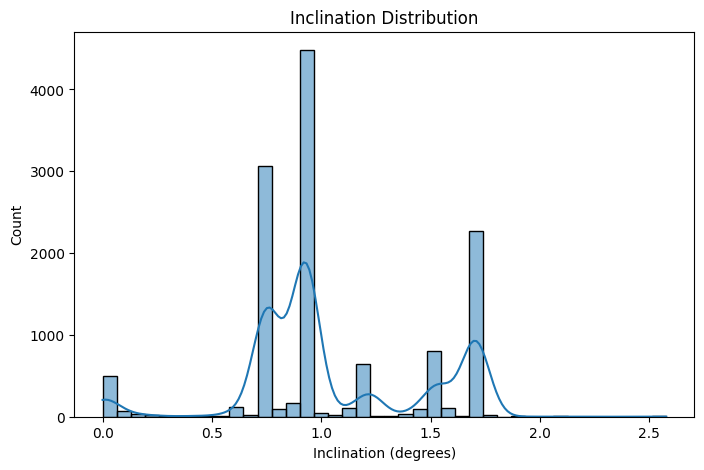

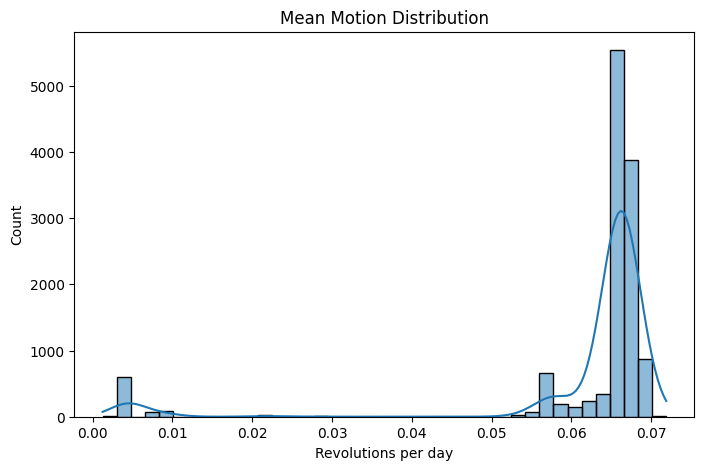


🔹 Top 10 Satellites with highest inclination:
                        Name                Epoch  Inclination (deg)  \
78    CLUSTER II-FM5 (RUMBA)  2025-09-20 08:22:08           2.576760   
79    CLUSTER II-FM8 (TANGO)  2025-09-24 17:35:02           2.555652   
77    CLUSTER II-FM7 (SAMBA)  2025-09-24 13:02:28           2.550680   
4987                 EROS C3  2025-09-25 23:50:37           2.431910   
613             SMDC ONE 2.4  2025-09-26 02:36:28           2.103052   
614                 MCUBED-2  2025-09-26 03:58:01           2.102938   
615                 TACSAT 6  2025-09-26 06:35:29           2.102661   
612                    ALICE  2025-09-26 02:30:33           2.102527   
616             SMDC ONE 2.3  2025-09-26 03:44:12           2.102446   
14                  LAGEOS 1  2025-09-25 17:50:09           1.917138   

      Eccentricity  Mean Motion (rev/day)  
78        0.911655               0.001873  
79        0.860562               0.001938  
77        0.859896          

In [ ]:
#  Loaded TLE Data & Basic EDA

from skyfield.api import load
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# Load TLE file
# ---------------------------
tle_path = r"data/satellites_active.tle"   
stations = load.tle_file(tle_path)
print(f"✅ Loaded {len(stations)} satellites")

# ---------------------------
# Extract metadata
# ---------------------------
data = []
for sat in stations:
    data.append({
        "Name": sat.name,
        "Epoch": sat.epoch.utc_strftime("%Y-%m-%d %H:%M:%S"),
        "Inclination (deg)": sat.model.inclo,
        "Eccentricity": sat.model.ecco,
        "Mean Motion (rev/day)": sat.model.no_kozai,
    })

df = pd.DataFrame(data)
print(df.head())

# Save metadata for later use
df.to_csv("data/satellite_metadata.csv", index=False)

# ---------------------------
# Basic EDA
# ---------------------------
plt.figure(figsize=(8,5))
sns.histplot(df["Inclination (deg)"], bins=40, kde=True)
plt.title("Inclination Distribution")
plt.xlabel("Inclination (degrees)")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df["Mean Motion (rev/day)"], bins=40, kde=True)
plt.title("Mean Motion Distribution")
plt.xlabel("Revolutions per day")
plt.show()

# Top 10 satellites by inclination
print("\n🔹 Top 10 Satellites with highest inclination:")
print(df.sort_values("Inclination (deg)", ascending=False).head(10))
